<a href="https://colab.research.google.com/github/lavanya957/loan-approval-prediction-model/blob/main/major_pro_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [50]:
df=pd.read_csv("/content/loan_approval_dataset.csv")

In [51]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [42]:
df.shape

(4269, 13)

In [43]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [52]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [57]:
df[" education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [58]:
df["education"]=labelencoder.fit_transform(df[" education"])
df["education"].unique()

array([0, 1])

In [54]:
df[" self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [55]:
df["Self_Employed"]=labelencoder.fit_transform(df[" self_employed"])
df["Self_Employed"].unique()

array([0, 1])

In [59]:
df[" loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [60]:
df["loan_status"]=labelencoder.fit_transform(df[" loan_status"])
df["loan_status"].unique()

array([0, 1])

In [67]:
x=df.drop(columns=["loan_id","loan_status"," education"," self_employed"," loan_status"],axis=1)
y=df["loan_status"]

In [91]:
y.value_counts()

0    2656
1    1613
Name: loan_status, dtype: int64

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
xscaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [69]:
xscaled.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Self_Employed,education
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0.0,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1.0,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0,0.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0,0.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1.0,1.0


In [70]:
xscaled.shape

(4269, 11)

In [72]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [73]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.2,random_state=2)

In [81]:
model=SVC()
model.fit(x_train,y_train)
x_train_pred=model.predict(x_train)
x_train_accuracy_score=accuracy_score(y_train,x_train_pred)
x_train_accuracy_score


0.9487554904831625

**test data evaluation**



In [82]:
x_test_pred=model.predict(x_test)
x_test_accuracy_score=accuracy_score(y_test,x_test_pred)
x_test_accuracy_score

0.9355971896955504

<Axes: >

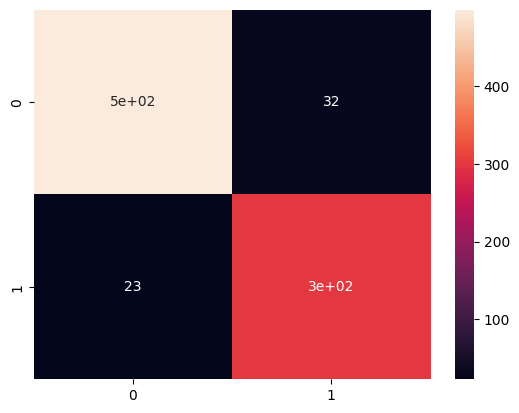

In [88]:
import seaborn as sns
cm=confusion_matrix(y_test,x_test_pred)
hm=sns.heatmap(cm,annot=True,cbar=True)
hm